In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importando os dados do csv

df = pd.read_csv('brr.csv')

df.head()

,ID,rodada,data,hora,dia,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_placar,visitante_placar,mandante_estado,visitante_estado,estado_vencedor
0,1,1,2003-03-29,16:00,Sabado,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,brinco de ouro,4,2,SP,RJ,SP
1,2,1,2003-03-29,16:00,Sabado,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,arena da baixada,2,0,PR,RS,PR
2,3,1,2003-03-30,16:00,Domingo,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,maracana,1,1,RJ,PR,-
3,4,1,2003-03-30,16:00,Domingo,Goias,Paysandu,NaN,NaN,NaN,NaN,-,serra dourada,2,2,GO,PA,-
4,5,1,2003-03-30,16:00,Domingo,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,beira rio,1,1,RS,SP,-


In [3]:
del df['rodada'], df['formacao_mandante'], df['formacao_visitante'], df['tecnico_mandante'], df['tecnico_visitante'], df['estado_vencedor'], df['hora'], df['ID'], df['arena'], df['mandante_estado'], df['visitante_estado']

In [4]:
df.shape

(7645, 7)

In [5]:
#para passar o nome dos times para tudo como maiúsculo, pelo fato do python ser case sensitive

df['vencedor'] = df['vencedor'].str.upper()
df['mandante'] = df['mandante'].str.upper()
df['visitante'] = df['visitante'].str.upper()
df.head()

,data,dia,mandante,visitante,vencedor,mandante_placar,visitante_placar
0,2003-03-29,Sabado,GUARANI,VASCO,GUARANI,4,2
1,2003-03-29,Sabado,ATHLETICO-PR,GREMIO,ATHLETICO-PR,2,0
2,2003-03-30,Domingo,FLAMENGO,CORITIBA,-,1,1
3,2003-03-30,Domingo,GOIAS,PAYSANDU,-,2,2
4,2003-03-30,Domingo,INTERNACIONAL,PONTE PRETA,-,1,1


In [6]:
#Retirando apenas o ano da data completa

df['data'] = pd.DatetimeIndex(df['data']).year
df.head()

,data,dia,mandante,visitante,vencedor,mandante_placar,visitante_placar
0,2003,Sabado,GUARANI,VASCO,GUARANI,4,2
1,2003,Sabado,ATHLETICO-PR,GREMIO,ATHLETICO-PR,2,0
2,2003,Domingo,FLAMENGO,CORITIBA,-,1,1
3,2003,Domingo,GOIAS,PAYSANDU,-,2,2
4,2003,Domingo,INTERNACIONAL,PONTE PRETA,-,1,1


In [7]:
#achando o total de gols em cada jogo

df['gols'] = df['mandante_placar'] + df['visitante_placar']
df.head()

,data,dia,mandante,visitante,vencedor,mandante_placar,visitante_placar,gols
0,2003,Sabado,GUARANI,VASCO,GUARANI,4,2,6
1,2003,Sabado,ATHLETICO-PR,GREMIO,ATHLETICO-PR,2,0,2
2,2003,Domingo,FLAMENGO,CORITIBA,-,1,1,2
3,2003,Domingo,GOIAS,PAYSANDU,-,2,2,4
4,2003,Domingo,INTERNACIONAL,PONTE PRETA,-,1,1,2


In [8]:
def vitoria_empate(valor):
    if valor == "-":
        return 0
    else:
        return 1

df['vencedor_binario'] = df['vencedor'].map(vitoria_empate)
df.head()

,data,dia,mandante,visitante,vencedor,mandante_placar,visitante_placar,gols,vencedor_binario
0,2003,Sabado,GUARANI,VASCO,GUARANI,4,2,6,1
1,2003,Sabado,ATHLETICO-PR,GREMIO,ATHLETICO-PR,2,0,2,1
2,2003,Domingo,FLAMENGO,CORITIBA,-,1,1,2,0
3,2003,Domingo,GOIAS,PAYSANDU,-,2,2,4,0
4,2003,Domingo,INTERNACIONAL,PONTE PRETA,-,1,1,2,0


In [9]:
#funções para converter vencedor em mandante/visitante ou empate

df.loc[df['vencedor'] == df['mandante'], 'vencedor_man_vis'] = 1
df.loc[df['vencedor'] == df['visitante'], 'vencedor_man_vis'] = 0
df.loc[df['vencedor'] == "-", 'vencedor_man_vis'] = -1

In [10]:
df.head()

,data,dia,mandante,visitante,vencedor,mandante_placar,visitante_placar,gols,vencedor_binario,vencedor_man_vis
0,2003,Sabado,GUARANI,VASCO,GUARANI,4,2,6,1,1.0
1,2003,Sabado,ATHLETICO-PR,GREMIO,ATHLETICO-PR,2,0,2,1,1.0
2,2003,Domingo,FLAMENGO,CORITIBA,-,1,1,2,0,-1.0
3,2003,Domingo,GOIAS,PAYSANDU,-,2,2,4,0,-1.0
4,2003,Domingo,INTERNACIONAL,PONTE PRETA,-,1,1,2,0,-1.0


In [11]:
#quantidade de vitorias e empates

df.groupby(['vencedor_man_vis']).size()

vencedor_man_vis
-1.0    2015
 0.0    1797
 1.0    3833
dtype: int64

In [12]:
empate = (2015/7645)*100
visitante = (1797/7645)*100
mandante = (3833/7645)*100

print(mandante, empate, visitante)
#mandante ganha quase a metade dos jogos?
#empate acontece mais do que vitória dos visitantes?

50.13734466971877 26.357096141268805 23.505559189012427


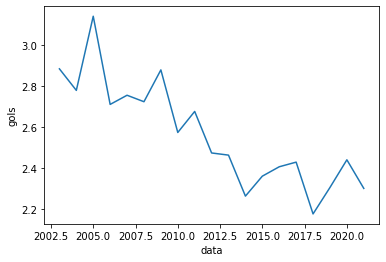

In [13]:
#achando a média de gols por jogo por ano

media_gols_ano = df.groupby(['data'])['gols'].mean()
fig = sns.lineplot(data=media_gols_ano)

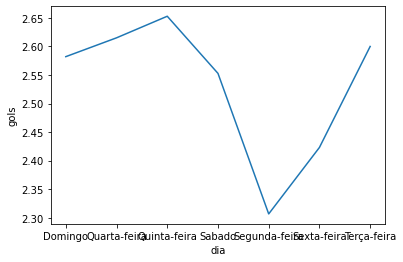

In [14]:
#achando a média de gols por jogo por dia

media_gols_dia = df.groupby(['dia'])['gols'].mean()
fig = sns.lineplot(data=media_gols_dia)

In [15]:
#achando o número de gols por dia da semana

df.groupby(['dia'])['gols'].sum()

dia
Domingo          9195
Quarta-feira     3669
Quinta-feira     1674
Sabado           4567
Segunda-feira     346
Sexta-feira        63
Terça-feira       221
Name: gols, dtype: int64

In [16]:
#achando o número de gols do time mandante por dia da semana

df.groupby(['dia'])['mandante_placar'].sum()

dia
Domingo          5497
Quarta-feira     2160
Quinta-feira     1060
Sabado           2789
Segunda-feira     200
Sexta-feira        32
Terça-feira       143
Name: mandante_placar, dtype: int64

In [17]:
#achando o número de gols do time visitante por dia da semana

df.groupby(['dia'])['visitante_placar'].sum()

dia
Domingo          3698
Quarta-feira     1509
Quinta-feira      614
Sabado           1778
Segunda-feira     146
Sexta-feira        31
Terça-feira        78
Name: visitante_placar, dtype: int64

In [18]:
#achando a influência do time mandante nos gols por dia da semana

m = df.groupby(['dia'])['mandante_placar'].sum()/df.groupby(['dia'])['gols'].sum()


In [19]:
#achando a influência do time visitante nos gols por dia da semana
#terça e quinta são os piores dias para apostar nos visitantes?

v = df.groupby(['dia'])['visitante_placar'].sum()/df.groupby(['dia'])['gols'].sum()

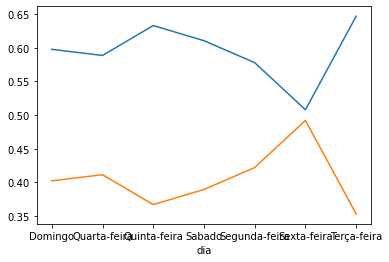

In [20]:
fig = sns.lineplot(data=m)
fig = sns.lineplot(data=v)


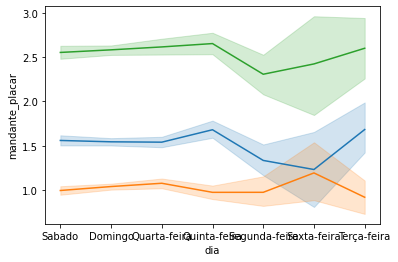

In [21]:
fig = sns.lineplot(data=df, x='dia', y='mandante_placar')
fig = sns.lineplot(data=df, x='dia', y='visitante_placar')
fig = sns.lineplot(data=df, x='dia', y='gols')